# Instagram Reach Analysis

# Description

# Importing Essential Python Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append(r'D:\Data_Projects\Instagram_Reach_Analysis\Instagram_Reach_Analysis\Src\Lib')
from helper_functions import *

import warnings
warnings.filterwarnings('ignore')

print('All of the libraries loaded')

All of the libraries loaded


# Loading CSV Dataset

In [3]:
path = r'D:\Data_Projects\Instagram_Reach_Analysis\Instagram_Reach_Analysis\Src\Data\Instagram data.csv'

In [4]:
data = pd.read_csv(path, encoding='latin1')

# General Information

In [5]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


checking the **missing values** :

In [7]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [8]:
data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000,119.000,119.000,119.000,119.000,119.000,119.000,119.000,119.000,119.000,119.000
mean,5703.992,2475.790,1887.513,1078.101,171.092,153.311,6.664,9.361,173.782,50.622,20.756
std,4843.780,1489.386,1884.361,2613.026,289.431,156.318,3.545,10.089,82.379,87.088,40.922
min,1941.000,1133.000,116.000,0.000,9.000,22.000,0.000,0.000,72.000,4.000,0.000
25%,3467.000,1945.000,726.000,157.500,38.000,65.000,4.000,3.000,121.500,15.000,4.000
50%,4289.000,2207.000,1278.000,326.000,74.000,109.000,6.000,6.000,151.000,23.000,8.000
75%,6138.000,2602.500,2363.500,689.500,196.000,169.000,8.000,13.500,204.000,42.000,18.000
max,36919.000,13473.000,11817.000,17414.000,2547.000,1095.000,19.000,75.000,549.000,611.000,260.000


Here, I want to seprate the columns to numerical and categorical 

In [12]:
numerical_columns = data.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
other_columns = data.select_dtypes(exclude=['int64', 'float64', 'int32', 'float32', 'object', 'category']).columns.tolist()

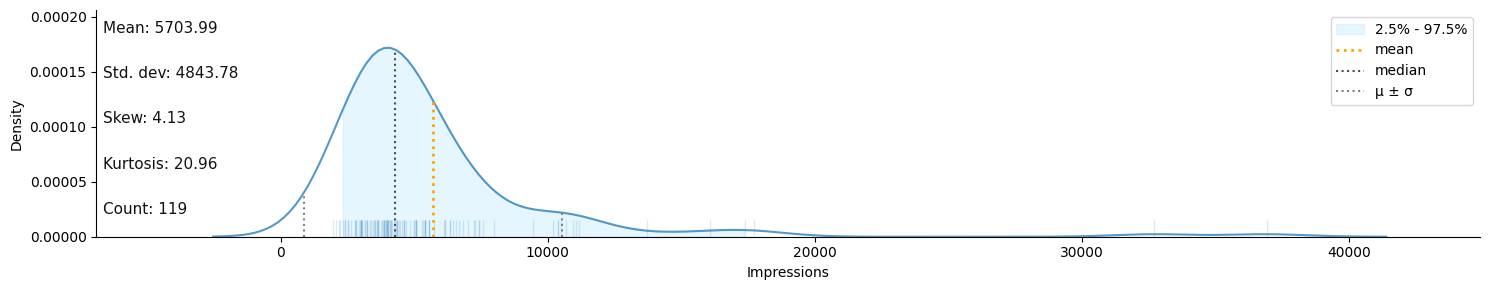

In [15]:
klib.dist_plot(data['Impressions']);

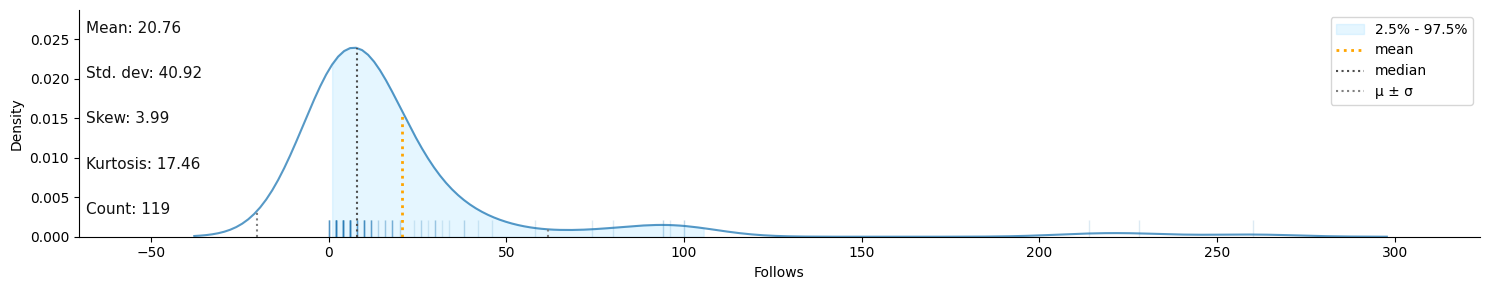

In [22]:
klib.dist_plot(data['Follows']);

Plotting histograms for the columns 'From Home', 'From Hashtags', 'From Explore', 'From Other'

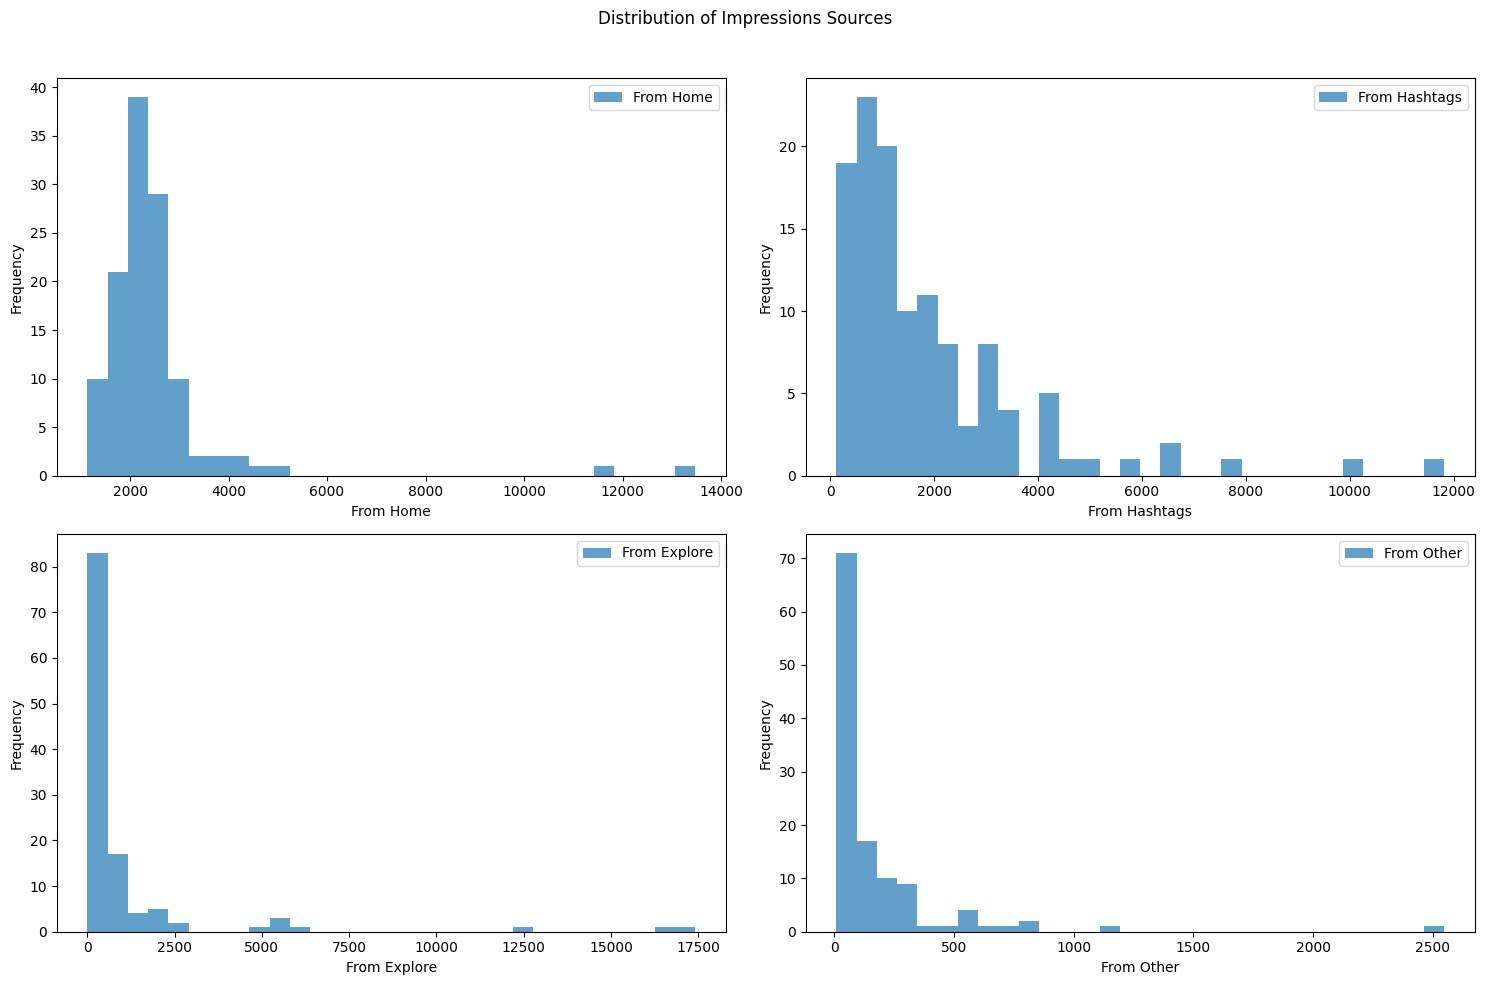

In [16]:
columns_to_compare = ['From Home', 'From Hashtags', 'From Explore', 'From Other']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_compare, 1):
    plt.subplot(2, 2, i)
    plt.hist(data[column], bins=30, alpha=0.7, label=column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.suptitle('Distribution of Impressions Sources')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

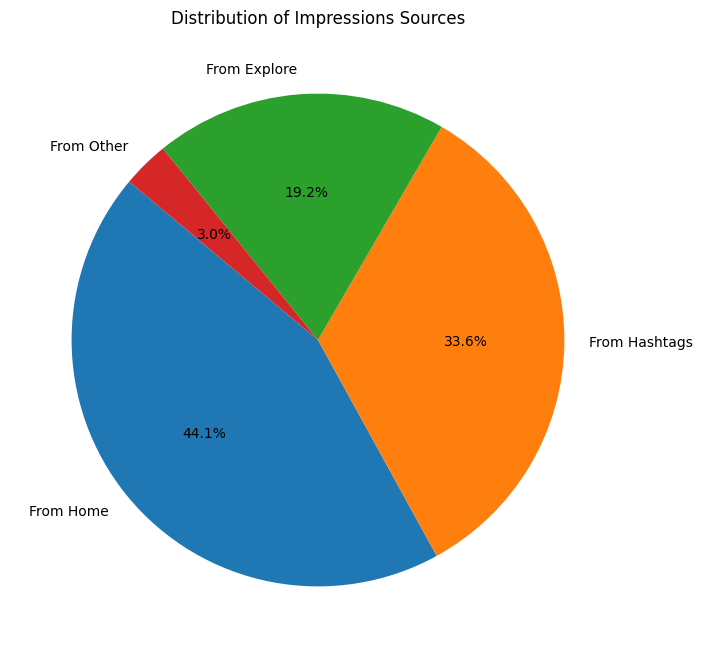

In [17]:
# Summing up the values for each source
sums = data[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Impressions Sources')
plt.show()

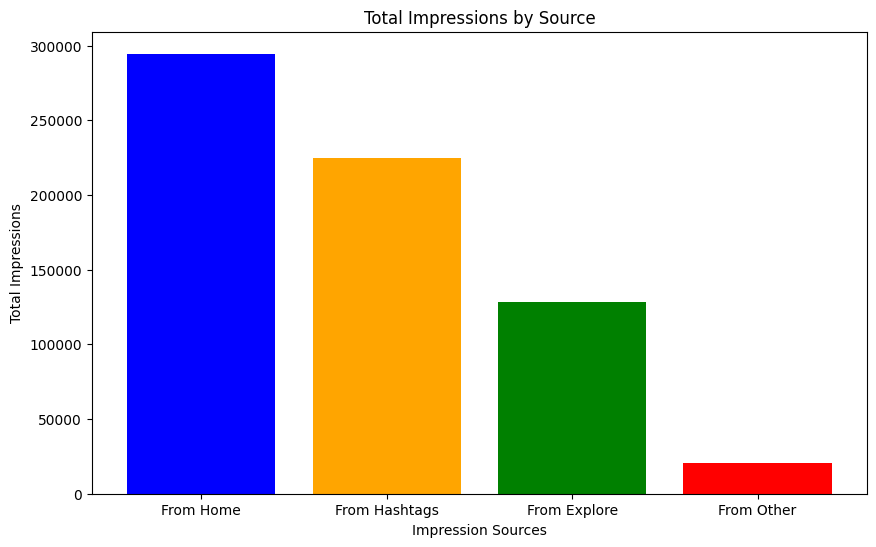

In [18]:
# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(sums.index, sums.values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Impression Sources')
plt.ylabel('Total Impressions')
plt.title('Total Impressions by Source')
plt.show()

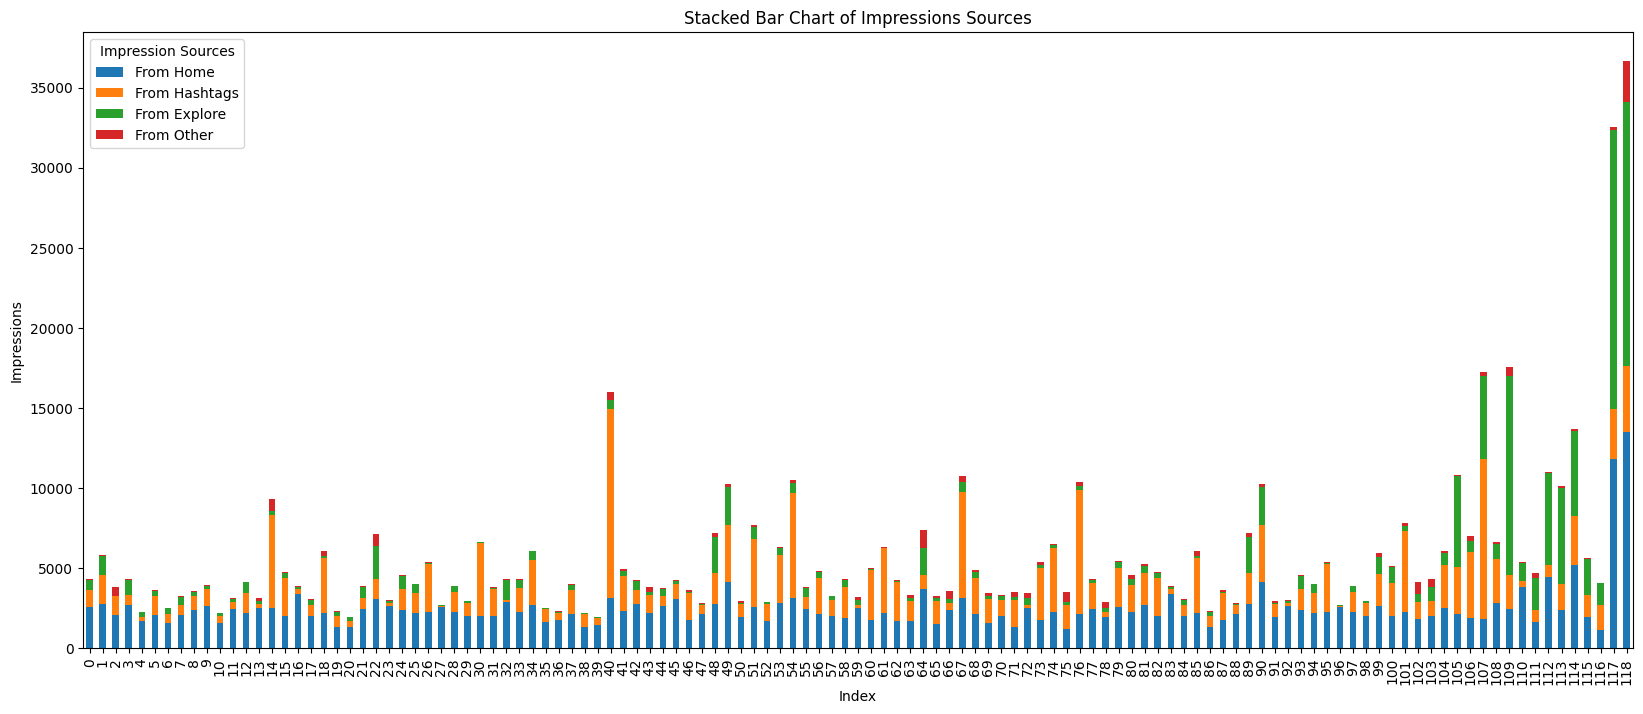

In [20]:
# Stacked bar chart
data_grouped = data[['From Home', 'From Hashtags', 'From Explore', 'From Other']]

data_grouped.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.xlabel('Index')
plt.ylabel('Impressions')
plt.title('Stacked Bar Chart of Impressions Sources')
plt.legend(title='Impression Sources')
plt.show()

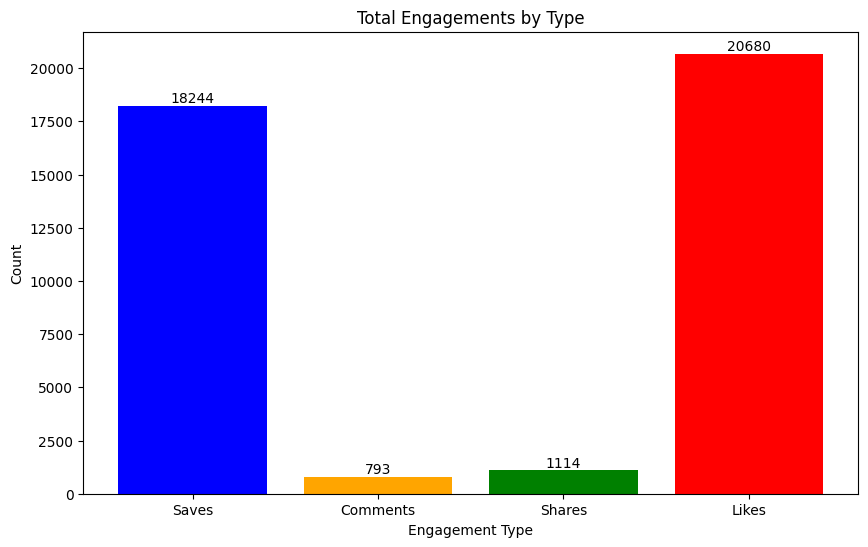

In [24]:
engagement_data = data[['Saves', 'Comments', 'Shares', 'Likes']].sum()

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(engagement_data.index, engagement_data.values, color=['blue', 'orange', 'green', 'red'])

ax.set_xlabel('Engagement Type')
ax.set_ylabel('Count')
ax.set_title('Total Engagements by Type')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')  # va: vertical alignment

plt.show()

Correlation Matrix

In [50]:
correlation = data[['Impressions','Follows', 'Profile Visits', 'Saves', 'Comments', 'Shares', 'Likes',
                    'From Home', 'From Hashtags', 'From Explore', 'From Other']].corr()

print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000
From Explore      0.894
Follows           0.889
Likes             0.850
From Home         0.845
Saves             0.779
Profile Visits    0.761
Shares            0.635
From Other        0.593
From Hashtags     0.561
Comments         -0.029
Name: Impressions, dtype: float64


In [53]:
correlation

,Impressions,Follows,Profile Visits,Saves,Comments,Shares,Likes,From Home,From Hashtags,From Explore,From Other
Impressions,1.000,0.889,0.761,0.779,-0.029,0.635,0.850,0.845,0.561,0.894,0.593
Follows,0.889,1.000,0.853,0.628,-0.061,0.493,0.746,0.673,0.555,0.796,0.547
Profile Visits,0.761,0.853,1.000,0.361,0.097,0.245,0.626,0.531,0.691,0.532,0.633
Saves,0.779,0.628,0.361,1.000,-0.027,0.860,0.846,0.769,0.306,0.748,0.332
Comments,-0.029,-0.061,0.097,-0.027,1.000,0.017,0.124,0.013,0.161,-0.159,-0.109
Shares,0.635,0.493,0.245,0.860,0.017,1.000,0.708,0.675,0.220,0.616,0.157
Likes,0.850,0.746,0.626,0.846,0.124,0.708,1.000,0.698,0.662,0.654,0.394
From Home,0.845,0.673,0.531,0.769,0.013,0.675,0.698,1.000,0.178,0.801,0.556
From Hashtags,0.561,0.555,0.691,0.306,0.161,0.220,0.662,0.178,1.000,0.190,0.230
From Explore,0.894,0.796,0.532,0.748,-0.159,0.616,0.654,0.801,0.190,1.000,0.496


Heatmap for better visualization of correlation matrix

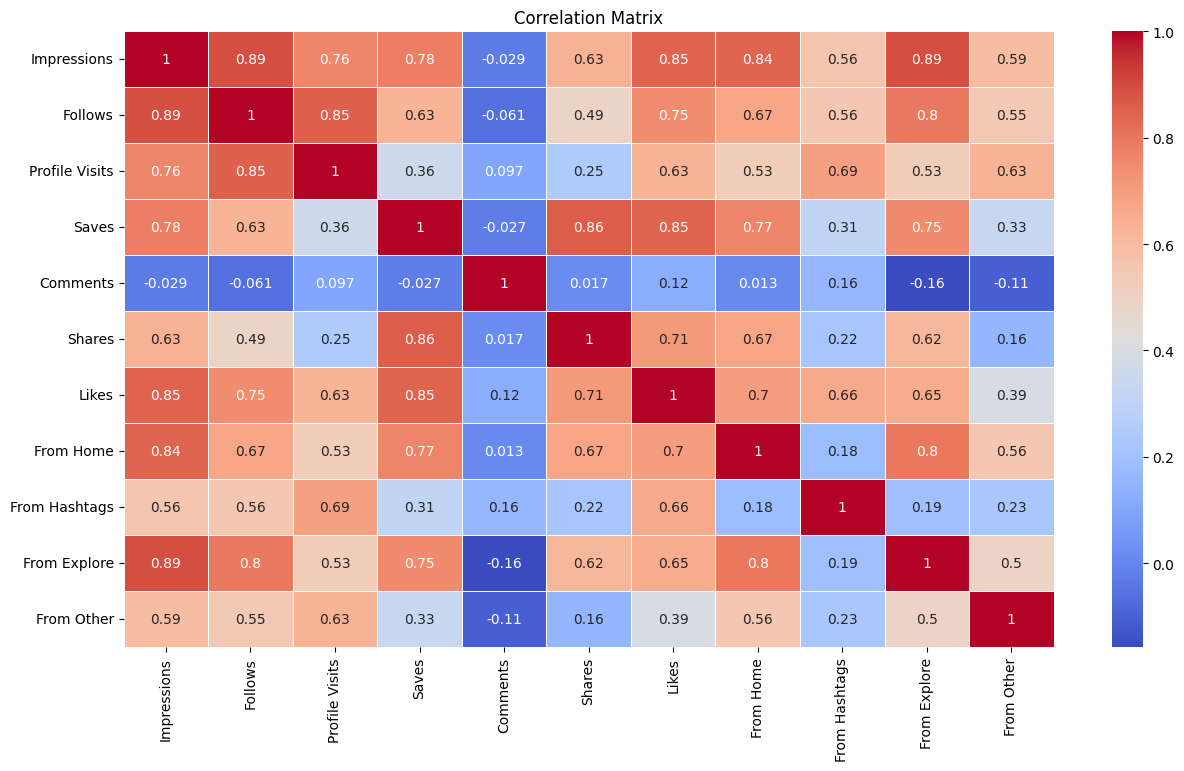

In [54]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Interpretation of the Heatmap**

* There is a strong relationship between Follows, Profile Visits, Saves, Shares, and Likes. This suggests that as users follow more accounts and visit more profiles, they are more likely to save, share, and like the content.

* The correlation between `Comments` and other engagement metrics is relatively low, suggesting that comments might be influenced by different factors compared to likes, shares, and saves.

Scatter plots for all engagements vs. Profile Visits and Follows

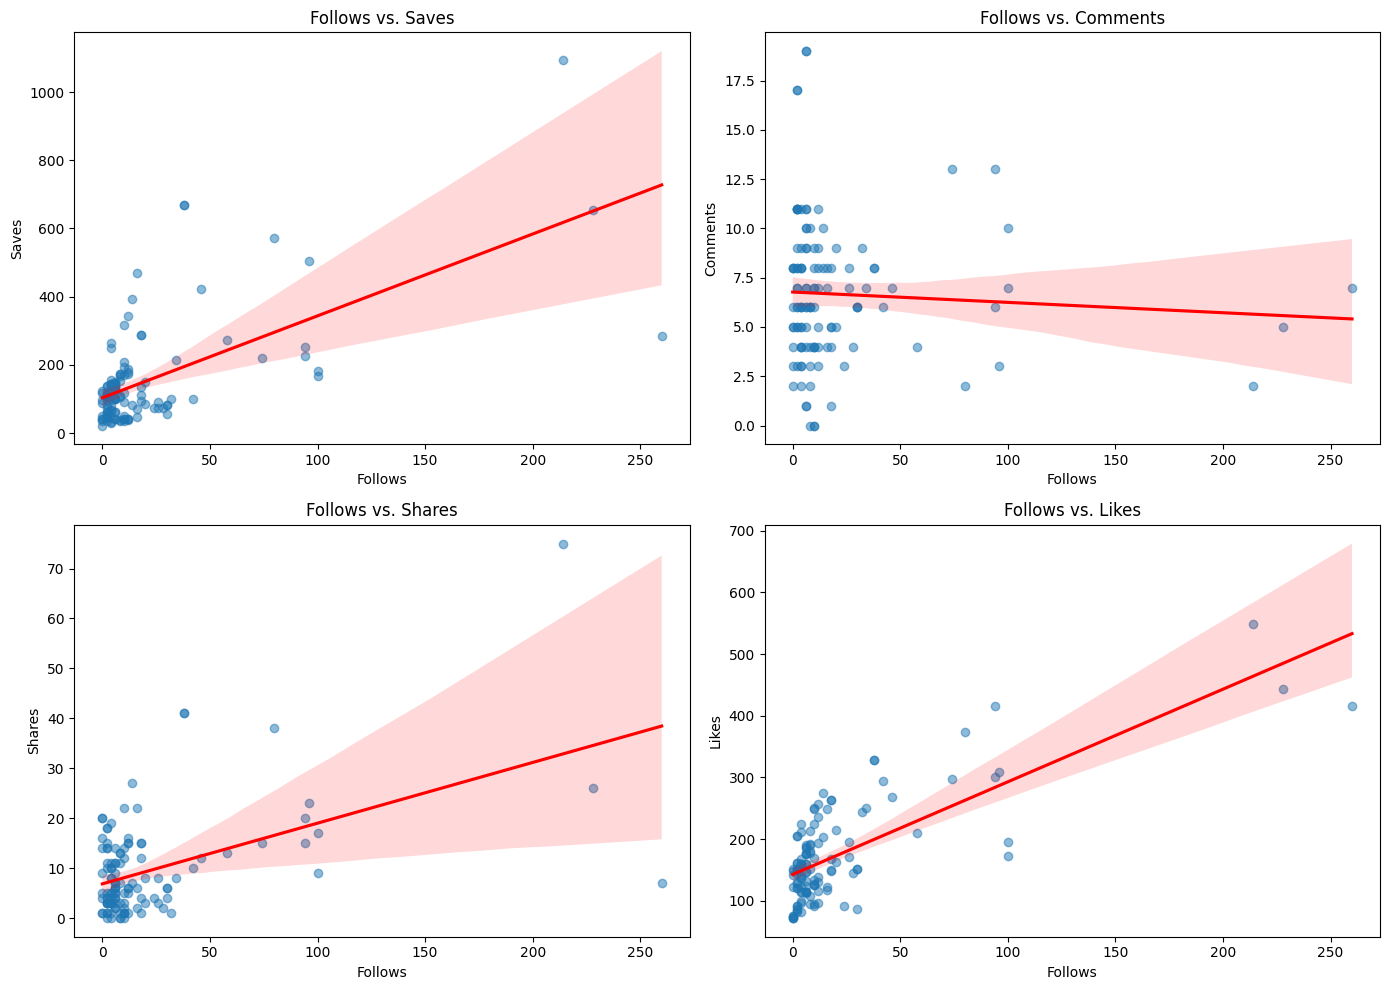

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(ax=axs[0, 0], x='Follows', y='Saves', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0, 0].set_xlabel('Follows')
axs[0, 0].set_ylabel('Saves')
axs[0, 0].set_title('Follows vs. Saves')

sns.regplot(ax=axs[0, 1], x='Follows', y='Comments', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0, 1].set_xlabel('Follows')
axs[0, 1].set_ylabel('Comments')
axs[0, 1].set_title('Follows vs. Comments')

sns.regplot(ax=axs[1, 0], x='Follows', y='Shares', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1, 0].set_xlabel('Follows')
axs[1, 0].set_ylabel('Shares')
axs[1, 0].set_title('Follows vs. Shares')

sns.regplot(ax=axs[1, 1], x='Follows', y='Likes', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1, 1].set_xlabel('Follows')
axs[1, 1].set_ylabel('Likes')
axs[1, 1].set_title('Follows vs. Likes')

plt.tight_layout()
plt.show()

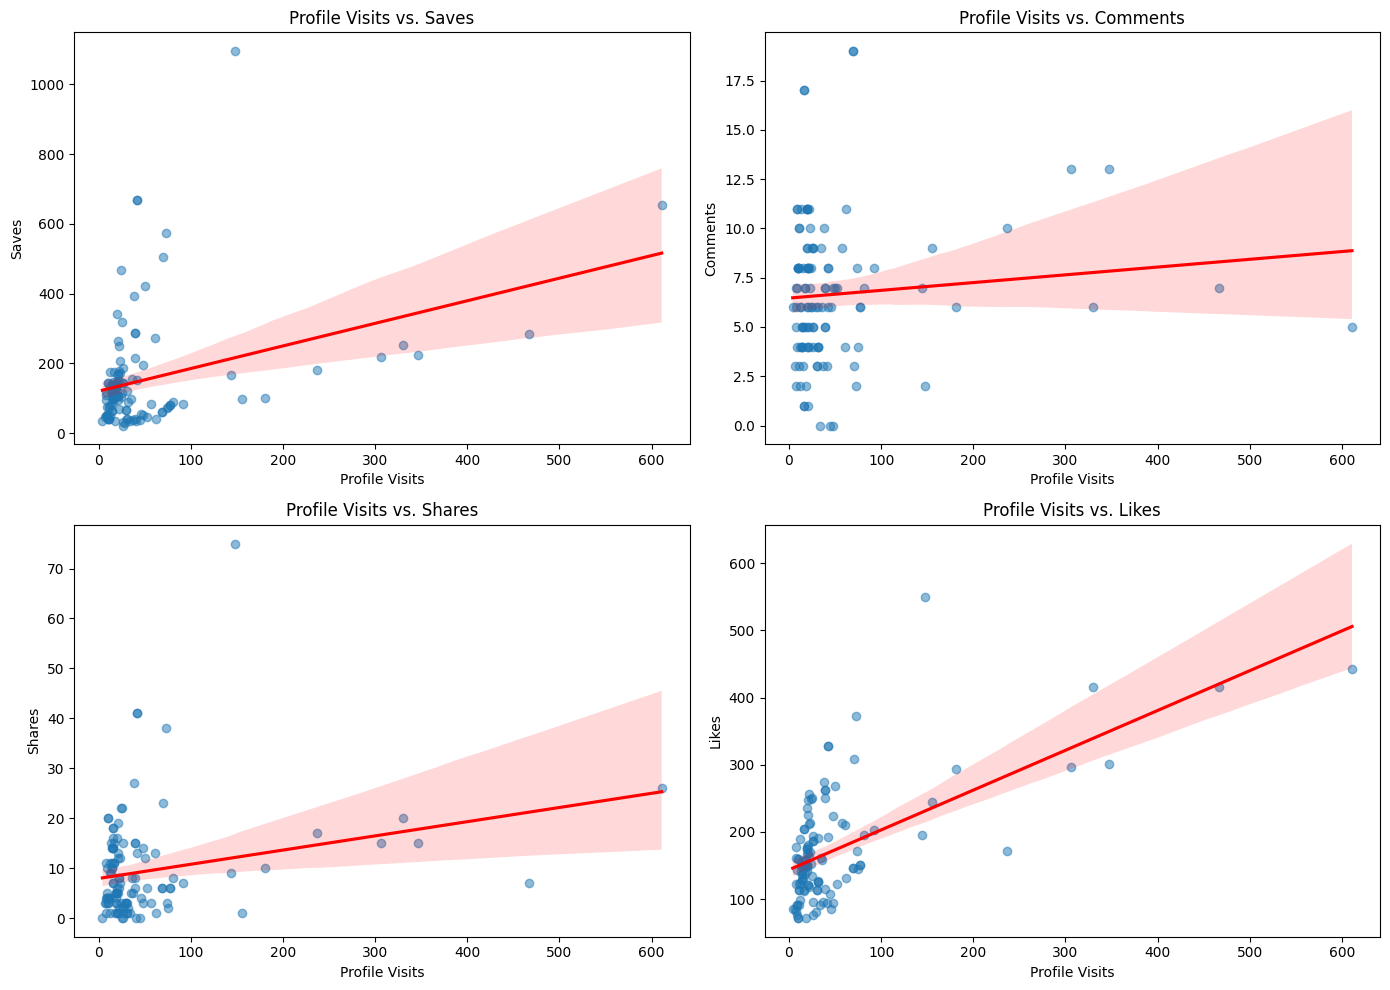

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(ax=axs[0, 0], x='Profile Visits', y='Saves', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0, 0].set_xlabel('Profile Visits')
axs[0, 0].set_ylabel('Saves')
axs[0, 0].set_title('Profile Visits vs. Saves')

sns.regplot(ax=axs[0, 1], x='Profile Visits', y='Comments', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0, 1].set_xlabel('Profile Visits')
axs[0, 1].set_ylabel('Comments')
axs[0, 1].set_title('Profile Visits vs. Comments')

sns.regplot(ax=axs[1, 0], x='Profile Visits', y='Shares', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1, 0].set_xlabel('Profile Visits')
axs[1, 0].set_ylabel('Shares')
axs[1, 0].set_title('Profile Visits vs. Shares')

sns.regplot(ax=axs[1, 1], x='Profile Visits', y='Likes', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1, 1].set_xlabel('Profile Visits')
axs[1, 1].set_ylabel('Likes')
axs[1, 1].set_title('Profile Visits vs. Likes')

plt.tight_layout()
plt.show()

Highlight outliers based on **z-score**

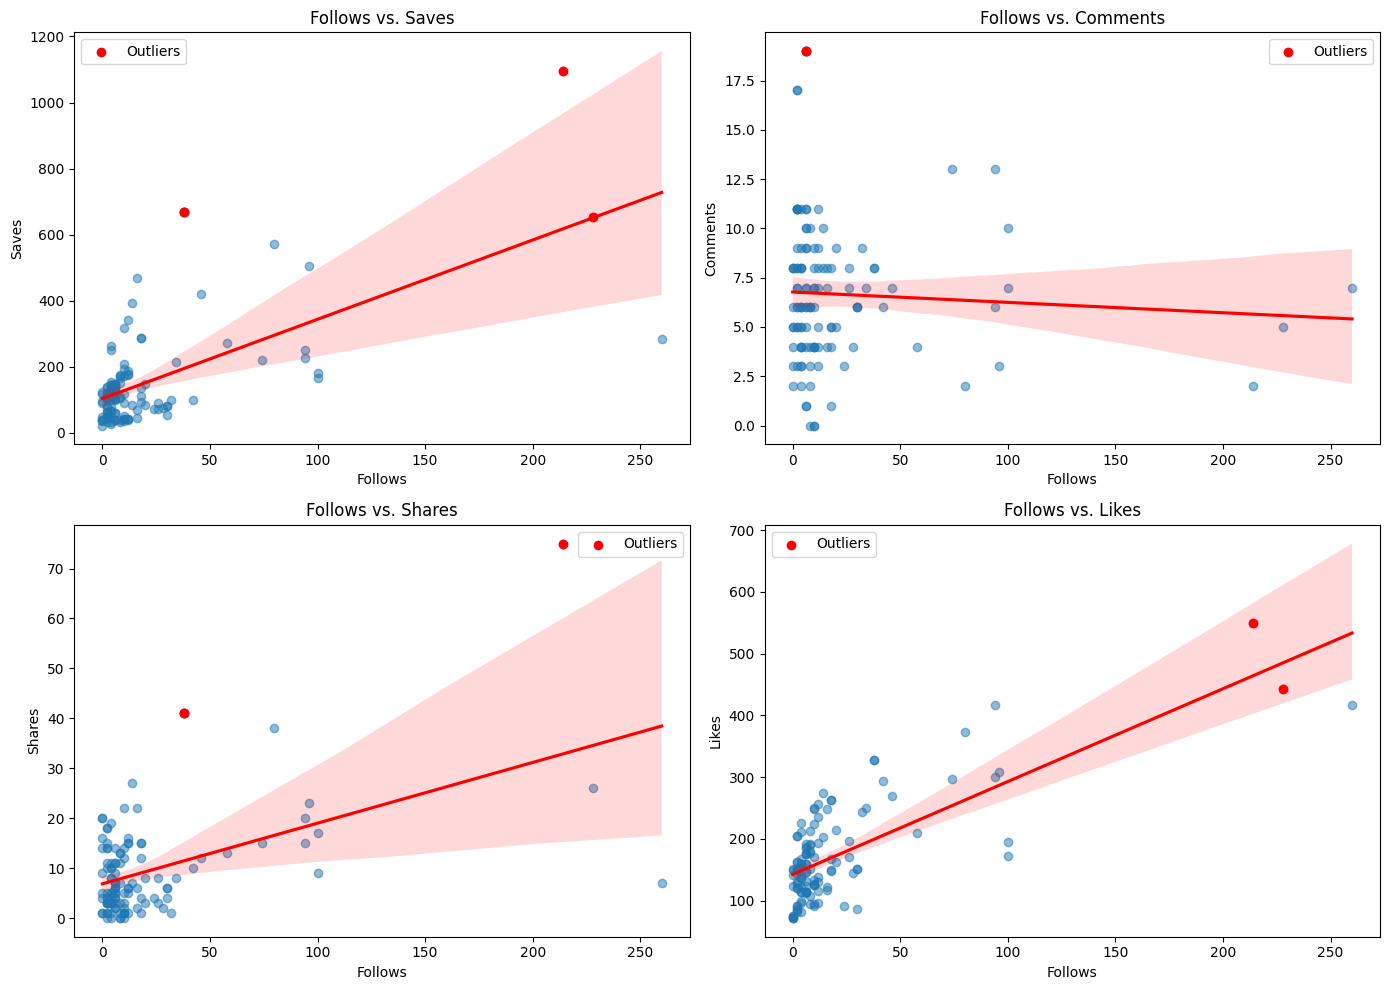

In [44]:
def highlight_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] > mean + 3 * std) | (df[column] < mean - 3 * std)]
    return outliers

outliers_saves = highlight_outliers(data, 'Saves')
outliers_comments = highlight_outliers(data, 'Comments')
outliers_shares = highlight_outliers(data, 'Shares')
outliers_likes = highlight_outliers(data, 'Likes')

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(ax=axs[0, 0], x='Follows', y='Saves', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0, 0].scatter(outliers_saves['Follows'], outliers_saves['Saves'], color='red', label='Outliers')
axs[0, 0].set_xlabel('Follows')
axs[0, 0].set_ylabel('Saves')
axs[0, 0].set_title('Follows vs. Saves')
axs[0, 0].legend()

sns.regplot(ax=axs[0, 1], x='Follows', y='Comments', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0, 1].scatter(outliers_comments['Follows'], outliers_comments['Comments'], color='red', label='Outliers')
axs[0, 1].set_xlabel('Follows')
axs[0, 1].set_ylabel('Comments')
axs[0, 1].set_title('Follows vs. Comments')
axs[0, 1].legend()

sns.regplot(ax=axs[1, 0], x='Follows', y='Shares', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1, 0].scatter(outliers_shares['Follows'], outliers_shares['Shares'], color='red', label='Outliers')
axs[1, 0].set_xlabel('Follows')
axs[1, 0].set_ylabel('Shares')
axs[1, 0].set_title('Follows vs. Shares')
axs[1, 0].legend()

sns.regplot(ax=axs[1, 1], x='Follows', y='Likes', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1, 1].scatter(outliers_likes['Follows'], outliers_likes['Likes'], color='red', label='Outliers')
axs[1, 1].set_xlabel('Follows')
axs[1, 1].set_ylabel('Likes')
axs[1, 1].set_title('Follows vs. Likes')
axs[1, 1].legend()

plt.tight_layout()
plt.show()
